In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [1]:
import numpy as np
import Functions
import pickle
import os
from matplotlib.colors import LogNorm
import time
import Functions

import matplotlib.pyplot as plt

In [4]:
plt.rcParams['font.size'] = '16'

In [2]:
EventNames = ['AGN', 'CART', 'EB', 'ILOT', 'KN_B19', 'KN_K17', 'MIRA', 'Mdwarf',
              'PISN', 'RRL', 'SLSN-I', 'SNII-NMF', 'SNII-Templates', 'SNIIn',
              'SNIa-91bg', 'SNIa-SALT2', 'SNIax', 'SNIbc-MOSFIT',
              'SNIbc-Templates', 'TDE', 'V19_CC+HostXT', 'uLens-Binary',
              'uLens-Single-GenLens', 'uLens-Single_PyLIMA']

RateDict = {key:1 for key in EventNames}
RateDict['KN_B19'] = 0
RateDict['KN_K17'] = 0
RateDict['V19_CC+HostXT'] = 0

In [3]:
PathCubeFolder = '/global/cscratch1/sd/lianming/Results'
CubeFileNames = os.listdir(PathCubeFolder)

In [4]:
CubeFileNames

['.ipynb_checkpoints', 'Nov28', 'Nov01.tar.gz', 'Nov01']

In [8]:
CubeFileNames = CubeFileNames[1:]
CubeFileNames

['ProbabilityCube_Nov 1_2008__Mdwarf.pkl',
 'ProbabilityCube_Nov 2_0414__V19_CC+HostXT.pkl',
 'ProbabilityCube_Nov 2_0441__uLens-Single-GenLens.pkl',
 'ProbabilityCube_Nov 1_1538__AGN.pkl',
 'ProbabilityCube_Nov 2_0305__SNIax.pkl',
 'ProbabilityCube_Nov 2_0058__SNIIn.pkl',
 'ProbabilityCube_Nov 2_0259__SNIbc-MOSFIT.pkl',
 'ProbabilityCube_Nov 2_0054__SNII-Templates.pkl',
 'ProbabilityCube_Nov 1_1530__CART.pkl',
 'ProbabilityCube_Nov 2_0331__SNIbc-Templates.pkl',
 'ProbabilityCube_Nov 1_1823__ILOT.pkl',
 'ProbabilityCube_Nov 2_0020__SNII-NMF.pkl',
 'ProbabilityCube_Nov 2_0430__uLens-Binary.pkl',
 'ProbabilityCube_Nov 2_0340__TDE.pkl',
 'ProbabilityCube_Nov 1_2303__RRL.pkl',
 'ProbabilityCube_Nov 2_0251__SNIa-SALT2.pkl',
 'ProbabilityCube_Nov 1_1818__EB.pkl',
 'ProbabilityCube_Nov 1_2334__SLSN-I.pkl',
 'ProbabilityCube_Nov 2_0121__SNIa-91bg.pkl',
 'ProbabilityCube_Nov 1_2204__PISN.pkl',
 'ProbabilityCube_Nov 2_0447__uLens-Single_PyLIMA.pkl',
 'ProbabilityCube_Nov 1_1924__MIRA.pkl']

In [9]:
FileNames = [ ii[28:-4] for ii in CubeFileNames ]

In [10]:
FileNames

['Mdwarf',
 'V19_CC+HostXT',
 'uLens-Single-GenLens',
 'AGN',
 'SNIax',
 'SNIIn',
 'SNIbc-MOSFIT',
 'SNII-Templates',
 'CART',
 'SNIbc-Templates',
 'ILOT',
 'SNII-NMF',
 'uLens-Binary',
 'TDE',
 'RRL',
 'SNIa-SALT2',
 'EB',
 'SLSN-I',
 'SNIa-91bg',
 'PISN',
 'uLens-Single_PyLIMA',
 'MIRA']

In [84]:
FileNames.sort()

In [11]:
CubeFileName = CubeFileNames[0]
EventName = CubeFileName[ CubeFileName.rfind('__')+2 : CubeFileName.rfind('.') ]
CubeFilePath = os.path.join(PathCubeFolder, CubeFileName)

with open(CubeFilePath, 'rb') as f:
    _ = pickle.load(f)
    InfoDict = pickle.load(f)
    HashTable = pickle.load(f)

TotalCube = HashTable * RateDict[EventName]

for CubeFileName in CubeFileNames[1:]:
    
    print('|', end='')

    EventName = CubeFileName[ CubeFileName.rfind('__')+2 : CubeFileName.rfind('.') ]
    CubeFilePath = os.path.join(PathCubeFolder, CubeFileName)

    with open(CubeFilePath, 'rb') as f:
        _ = pickle.load(f)
        _ = pickle.load(f)
        HashTable = pickle.load(f)

    TotalCube = TotalCube + HashTable * RateDict[EventName]

if TotalCube.min() < 0:
    print('Data overflow, please check!')


|||||||||||||||||||||

In [12]:
TotalCubeNorm = TotalCube / TotalCube.max(-1, keepdims=True).max(-2, keepdims=True)
np.nan_to_num(TotalCubeNorm, copy=False);

<ipython-input-12-639eb30487e3>:1: RuntimeWarning: invalid value encountered in true_divide
  TotalCubeNorm = TotalCube / TotalCube.max(-1, keepdims=True).max(-2, keepdims=True)


In [5]:
with open('TotalCubeNorm.pkl', 'wb') as f:
    pickle.dump(EventNames, f)
    pickle.dump(InfoDict, f)
    pickle.dump(TotalCubeNorm, f ) 

NameError: name 'InfoDict' is not defined

In [13]:
def PlotCubeSlice(DataCube, InfoDict, Band1, Band2, dT1, dT2):

    fig, ax = plt.subplots(1, 1, figsize=(7, 5))

    Map = Enquiry(DataCube, InfoDict, Band1, Band2, dT1, dT2) * 10000000

    plt.pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1, 
               norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
    # plt.title('Filters: {}, {}  Time Gaps: {}, {}'.format(Band1, Band2, dT1, dT2))
    # plt.colorbar()
    
    plt.xlim([-1.5, 2])
    plt.ylim([-5, 8])

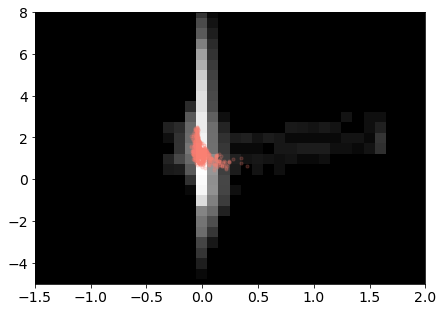

In [239]:
PlotCubeSlice(TotalCubeNorm, InfoDict, 'g', 'i', 60, 60)
plt.scatter(data6060[0], data6060[1], c='salmon', s=10, alpha=0.2)

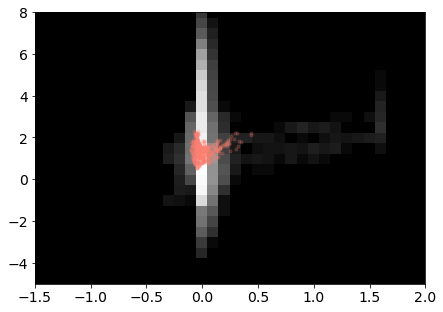

In [240]:
PlotCubeSlice(TotalCubeNorm, InfoDict, 'g', 'i', 450, 60)
plt.scatter(data45060[0], data45060[1], c='salmon', s=10, alpha=0.2)

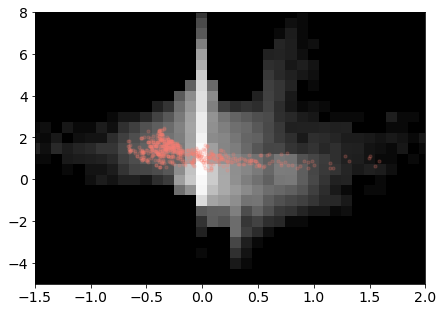

In [241]:
PlotCubeSlice(TotalCubeNorm, InfoDict, 'g', 'i', 60, 450)
plt.scatter(data60450[0], data60450[1], c='salmon', s=10, alpha=0.2)

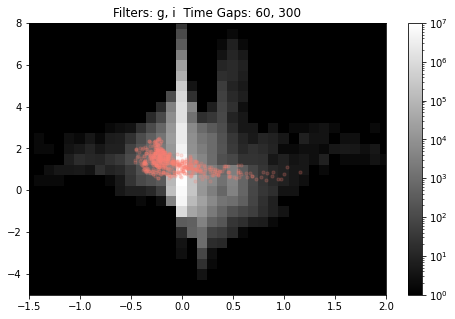

In [215]:
PlotCubeSlice(TotalCubeNorm, InfoDict, 'g', 'i', 60, 300)
plt.scatter(data60300[0], data60300[1], c='salmon', s=10, alpha=0.2)

In [88]:
'EB' in EventNames[2]

True

In [86]:
EventNames = ['AGN',
             'CART',
             'EB',
             'ILOT',
             'KN_B19',
             'KN_K17',
             'MIRA',
             'Mdwarf',
             'PISN',
             'RRL',
             'SLSN-I',
             'SNII-NMF',
             'SNII-Templates',
             'SNIIn',
             'SNIa-91bg',
             'SNIa-SALT2',
             'SNIax',
             'SNIbc-MOSFIT',
             'SNIbc-Templates',
             'TDE',
             'V19_CC+HostXT',
             'uLens-Binary',
             'uLens-Single-GenLens',
             'uLens-Single_PyLIMA']

0

In [14]:
DataKN = [data6060, data45060, data60450]

||

<ipython-input-127-73830bd63264>:37: RuntimeWarning: invalid value encountered in true_divide
  CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)


||||||||||||||||||||||

(-5.0, 8.0)

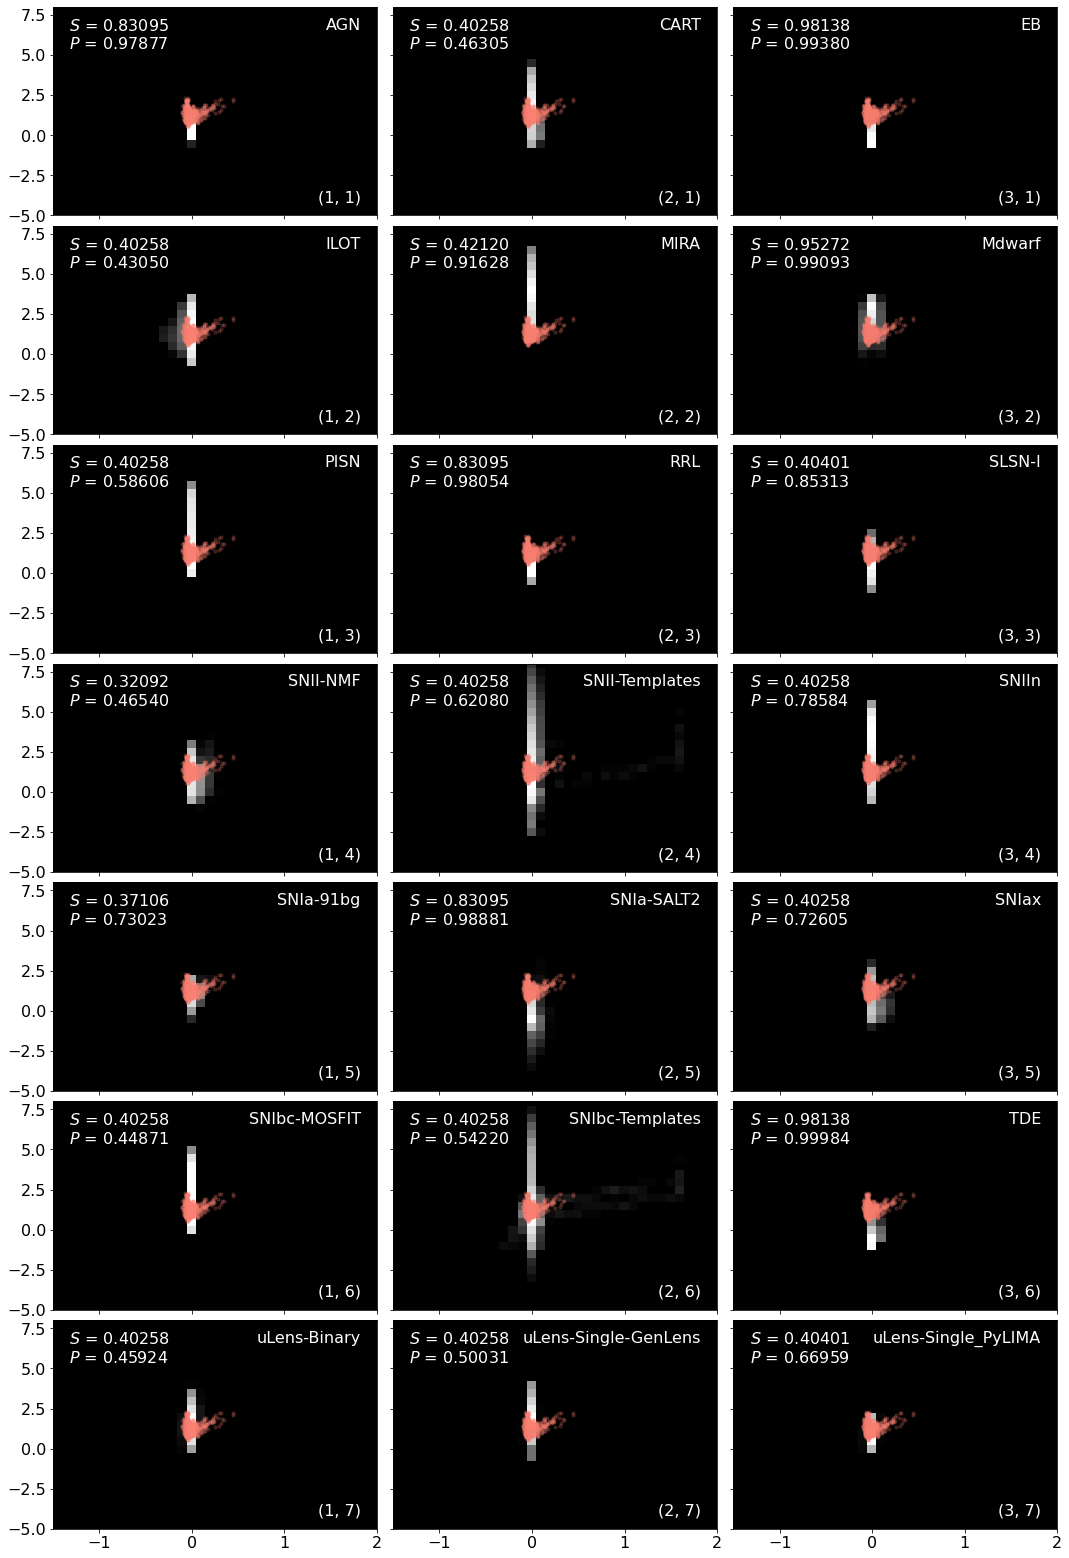

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [ ]:
Band1 = 'g'
Band2 = 'i'
TimeGaps = [ [60, 60], [450, 60], [60, 450] ]
thr = 0.003

jj = 1

Space = 0.05
ColNo = 3
RowNo = 7

FTHist,_,_ = np.histogram2d(DataKN[jj][0], DataKN[jj][1], bins=[InfoDict['BinMag'], InfoDict['BinColor']])

fig, axs = plt.subplots(RowNo, ColNo, figsize = (18, 4*RowNo), sharex=True, sharey=True)
fig.subplots_adjust(hspace=Space, wspace=Space)
axsflat = axs.flatten()

ii=0

for EventName in EventNames:
    
    print('|', end='')

    if EventName == 'V19_CC+HostXT'or 'KN' in EventName:
        continue
    for CubeFileName in CubeFileNames:
        if EventName in CubeFileName:
            break
            
    CubeFilePath = os.path.join(PathCubeFolder, CubeFileName)

    with open(CubeFilePath, 'rb') as f:
        _ = pickle.load(f)
        InfoDict = pickle.load(f)
        Cube = pickle.load(f)
        
    CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)
    np.nan_to_num(CubeNorm, copy=False);
    
    Map = Enquiry(CubeNorm, InfoDict, Band1, Band2, *TimeGaps[jj])
    
    # Scores    
    Mask = Map < thr    
    Score1 = np.sum(FTHist[Mask]) / np.sum(FTHist)    
    Score2 = 1 - np.sum( Map*FTHist ) / np.sum(FTHist)
    
    Map = Map*100000
    
    axsflat[ii].pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1,
                      norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
    axsflat[ii].scatter(DataKN[jj][0], DataKN[jj][1], c='salmon', s=10, alpha=0.2)
    axsflat[ii].text(0.95, 0.95, EventName, c='w', ha='right', va='top', transform=axsflat[ii].transAxes)    
    axsflat[ii].text(0.05, 0.95, '$S$ = {:.5f}\n$P$ = {:.5f}'.format(Score1, Score2), 
                     c='w', ha='left', va='top', transform=axsflat[ii].transAxes)
    axsflat[ii].text(0.95, 0.05, '({}, {})'.format(ii%3+1, ii//3+1), 
                     c='w', ha='right', va='bottom', transform=axsflat[ii].transAxes)  
    
    ii += 1
        
axs[0,0].set_xlim([-1.5, 2])
axs[0,0].set_ylim([-5, 8])
    # plt.title('Filters: {}, {}  Time Gaps: {}, {}'.format(Band1, Band2, dT1, dT2))
    # plt.colorbar()
    
# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor="none", bottom=False, left=False )

# plt.xlabel('Time (days)', fontsize=15, labelpad=15)
# if Prop == 'SIM_MAGOBS':
#     if Space==True:
#         plt.ylabel('Apparent Magnitude', fontsize=15, labelpad=25)
#     else:
#         plt.ylabel('Apparent Magnitude', fontsize=15)
# else:
#     if Space==True:
#         plt.ylabel(Prop, fontsize=15, labelpad=20)        
#     else:
#         plt.ylabel(Prop, fontsize=15)


||

<ipython-input-136-e321abc35845>:37: RuntimeWarning: invalid value encountered in true_divide
  CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)


||||||||||||||||||||||

(-5.0, 8.0)

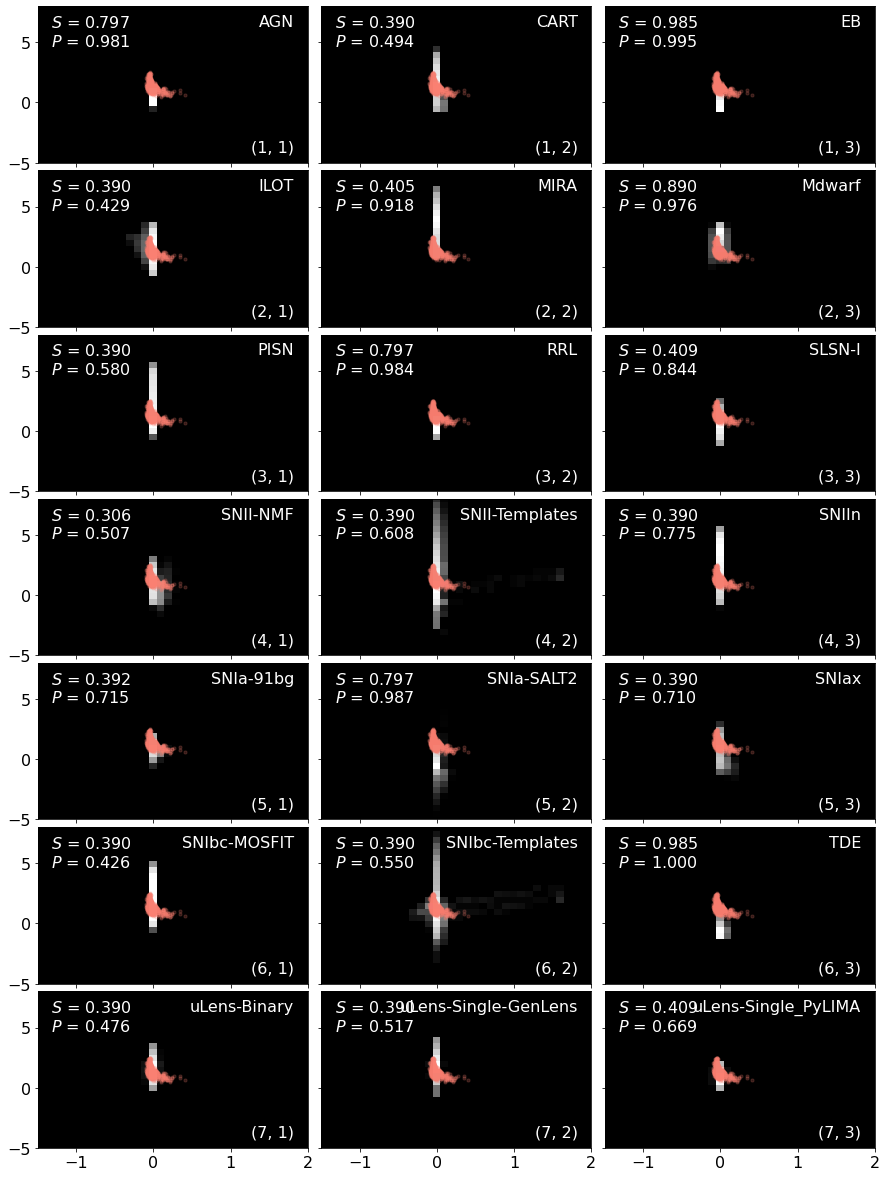

In [136]:
Band1 = 'g'
Band2 = 'i'
TimeGaps = [ [60, 60], [450, 60], [60, 450] ]
thr = 0.003

jj = 0

Space = 0.05
ColNo = 3
RowNo = 7

FTHist,_,_ = np.histogram2d(DataKN[jj][0], DataKN[jj][1], bins=[InfoDict['BinMag'], InfoDict['BinColor']])

fig, axs = plt.subplots(RowNo, ColNo, figsize = (15, 3*RowNo), sharex=True, sharey=True)
fig.subplots_adjust(hspace=Space, wspace=Space)
axsflat = axs.flatten()

ii=0

for EventName in EventNames:
    
    print('|', end='')

    if EventName == 'V19_CC+HostXT'or 'KN' in EventName:
        continue
    for CubeFileName in CubeFileNames:
        if EventName in CubeFileName:
            break
            
    CubeFilePath = os.path.join(PathCubeFolder, CubeFileName)

    with open(CubeFilePath, 'rb') as f:
        _ = pickle.load(f)
        InfoDict = pickle.load(f)
        Cube = pickle.load(f)
        
    CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)
    np.nan_to_num(CubeNorm, copy=False);
    
    Map = Enquiry(CubeNorm, InfoDict, Band1, Band2, *TimeGaps[jj])
    
    # Scores    
    Mask = Map < thr    
    Score1 = np.sum(FTHist[Mask]) / np.sum(FTHist)    
    Score2 = 1 - np.sum( Map*FTHist ) / np.sum(FTHist)
    
    Map = Map*100000
    
    axsflat[ii].pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1,
                      norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
    axsflat[ii].scatter(DataKN[jj][0], DataKN[jj][1], c='salmon', s=10, alpha=0.2)
    axsflat[ii].text(0.95, 0.95, EventName, c='w', ha='right', va='top', transform=axsflat[ii].transAxes)    
    axsflat[ii].text(0.05, 0.95, '$S$ = {:.3f}\n$P$ = {:.3f}'.format(Score1, Score2), 
                     c='w', ha='left', va='top', transform=axsflat[ii].transAxes)
    axsflat[ii].text(0.95, 0.05, '({}, {})'.format(ii//3+1, ii%3+1), 
                     c='w', ha='right', va='bottom', transform=axsflat[ii].transAxes)  
    
    ii += 1
        
axs[0,0].set_xlim([-1.5, 2])
axs[0,0].set_ylim([-5, 8])
    # plt.title('Filters: {}, {}  Time Gaps: {}, {}'.format(Band1, Band2, dT1, dT2))
    # plt.colorbar()
    
# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor="none", bottom=False, left=False )

# plt.xlabel('Time (days)', fontsize=15, labelpad=15)
# if Prop == 'SIM_MAGOBS':
#     if Space==True:
#         plt.ylabel('Apparent Magnitude', fontsize=15, labelpad=25)
#     else:
#         plt.ylabel('Apparent Magnitude', fontsize=15)
# else:
#     if Space==True:
#         plt.ylabel(Prop, fontsize=15, labelpad=20)        
#     else:
#         plt.ylabel(Prop, fontsize=15)


||

<ipython-input-137-0f0b963e97d9>:37: RuntimeWarning: invalid value encountered in true_divide
  CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)


||||||||||||||||||||||

(-5.0, 8.0)

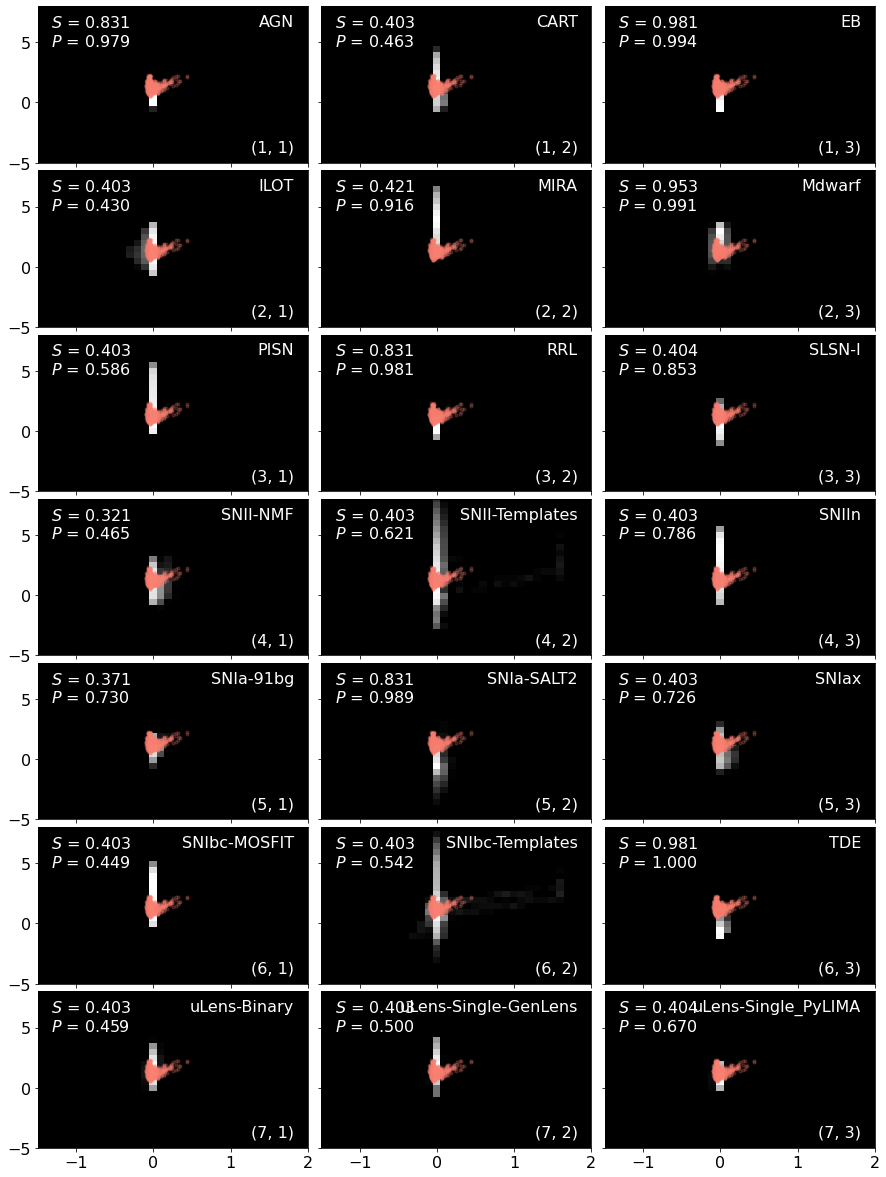

In [137]:
Band1 = 'g'
Band2 = 'i'
TimeGaps = [ [60, 60], [450, 60], [60, 450] ]
thr = 0.003

jj = 1

Space = 0.05
ColNo = 3
RowNo = 7

FTHist,_,_ = np.histogram2d(DataKN[jj][0], DataKN[jj][1], bins=[InfoDict['BinMag'], InfoDict['BinColor']])

fig, axs = plt.subplots(RowNo, ColNo, figsize = (15, 3*RowNo), sharex=True, sharey=True)
fig.subplots_adjust(hspace=Space, wspace=Space)
axsflat = axs.flatten()

ii=0

for EventName in EventNames:
    
    print('|', end='')

    if EventName == 'V19_CC+HostXT'or 'KN' in EventName:
        continue
    for CubeFileName in CubeFileNames:
        if EventName in CubeFileName:
            break
            
    CubeFilePath = os.path.join(PathCubeFolder, CubeFileName)

    with open(CubeFilePath, 'rb') as f:
        _ = pickle.load(f)
        InfoDict = pickle.load(f)
        Cube = pickle.load(f)
        
    CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)
    np.nan_to_num(CubeNorm, copy=False);
    
    Map = Enquiry(CubeNorm, InfoDict, Band1, Band2, *TimeGaps[jj])
    
    # Scores    
    Mask = Map < thr    
    Score1 = np.sum(FTHist[Mask]) / np.sum(FTHist)    
    Score2 = 1 - np.sum( Map*FTHist ) / np.sum(FTHist)
    
    Map = Map*100000
    
    axsflat[ii].pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1,
                      norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
    axsflat[ii].scatter(DataKN[jj][0], DataKN[jj][1], c='salmon', s=10, alpha=0.2)
    axsflat[ii].text(0.95, 0.95, EventName, c='w', ha='right', va='top', transform=axsflat[ii].transAxes)    
    axsflat[ii].text(0.05, 0.95, '$S$ = {:.3f}\n$P$ = {:.3f}'.format(Score1, Score2), 
                     c='w', ha='left', va='top', transform=axsflat[ii].transAxes)
    axsflat[ii].text(0.95, 0.05, '({}, {})'.format(ii//3+1, ii%3+1), 
                     c='w', ha='right', va='bottom', transform=axsflat[ii].transAxes)  
    
    ii += 1
        
axs[0,0].set_xlim([-1.5, 2])
axs[0,0].set_ylim([-5, 8])
    # plt.title('Filters: {}, {}  Time Gaps: {}, {}'.format(Band1, Band2, dT1, dT2))
    # plt.colorbar()
    
# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor="none", bottom=False, left=False )

# plt.xlabel('Time (days)', fontsize=15, labelpad=15)
# if Prop == 'SIM_MAGOBS':
#     if Space==True:
#         plt.ylabel('Apparent Magnitude', fontsize=15, labelpad=25)
#     else:
#         plt.ylabel('Apparent Magnitude', fontsize=15)
# else:
#     if Space==True:
#         plt.ylabel(Prop, fontsize=15, labelpad=20)        
#     else:
#         plt.ylabel(Prop, fontsize=15)


||

<ipython-input-138-b33a204e6089>:37: RuntimeWarning: invalid value encountered in true_divide
  CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)


||||||||||||||||||||||

(-5.0, 8.0)

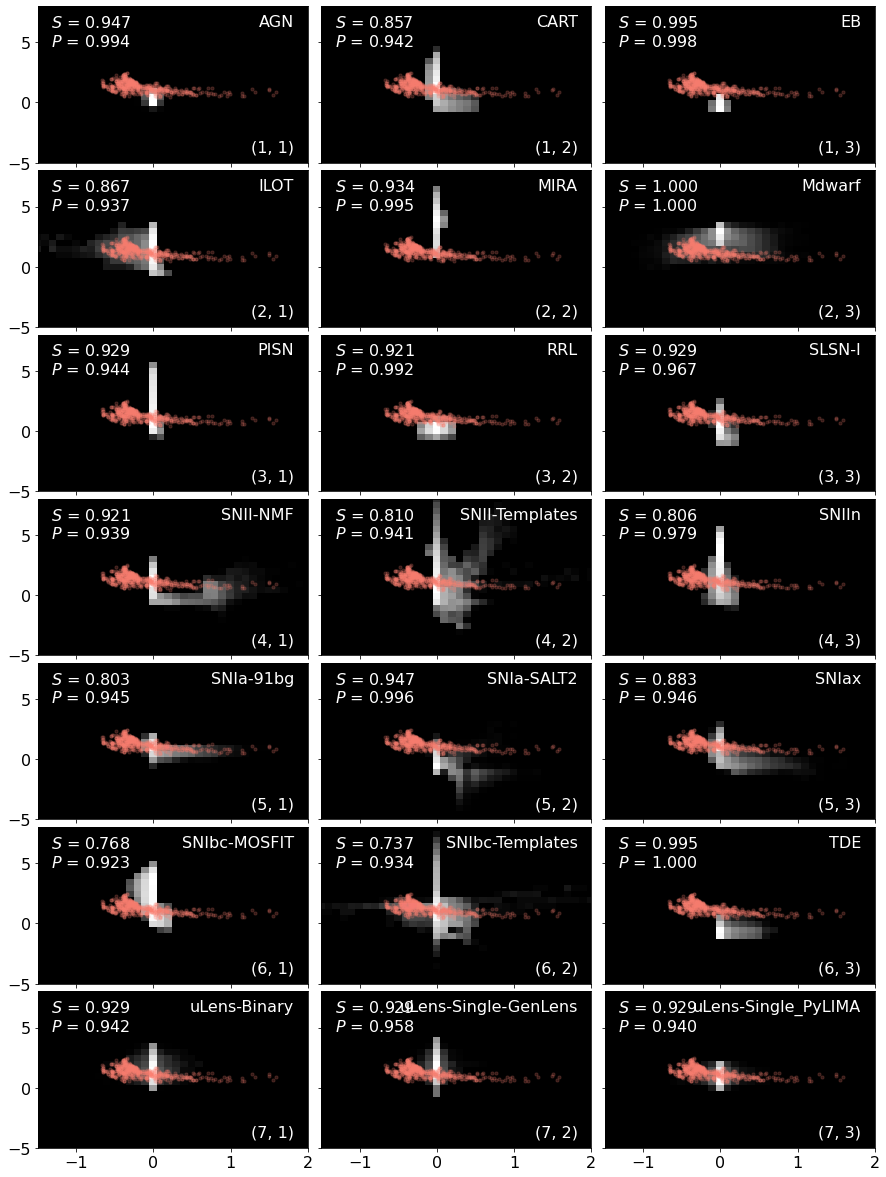

In [138]:
Band1 = 'g'
Band2 = 'i'
TimeGaps = [ [60, 60], [450, 60], [60, 450] ]
thr = 0.003

jj = 2

Space = 0.05
ColNo = 3
RowNo = 7

FTHist,_,_ = np.histogram2d(DataKN[jj][0], DataKN[jj][1], bins=[InfoDict['BinMag'], InfoDict['BinColor']])

fig, axs = plt.subplots(RowNo, ColNo, figsize = (15, 3*RowNo), sharex=True, sharey=True)
fig.subplots_adjust(hspace=Space, wspace=Space)
axsflat = axs.flatten()

ii=0

for EventName in EventNames:
    
    print('|', end='')

    if EventName == 'V19_CC+HostXT'or 'KN' in EventName:
        continue
    for CubeFileName in CubeFileNames:
        if EventName in CubeFileName:
            break
            
    CubeFilePath = os.path.join(PathCubeFolder, CubeFileName)

    with open(CubeFilePath, 'rb') as f:
        _ = pickle.load(f)
        InfoDict = pickle.load(f)
        Cube = pickle.load(f)
        
    CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)
    np.nan_to_num(CubeNorm, copy=False);
    
    Map = Enquiry(CubeNorm, InfoDict, Band1, Band2, *TimeGaps[jj])
    
    # Scores    
    Mask = Map < thr    
    Score1 = np.sum(FTHist[Mask]) / np.sum(FTHist)    
    Score2 = 1 - np.sum( Map*FTHist ) / np.sum(FTHist)
    
    Map = Map*100000
    
    axsflat[ii].pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1,
                      norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
    axsflat[ii].scatter(DataKN[jj][0], DataKN[jj][1], c='salmon', s=10, alpha=0.2)
    axsflat[ii].text(0.95, 0.95, EventName, c='w', ha='right', va='top', transform=axsflat[ii].transAxes)    
    axsflat[ii].text(0.05, 0.95, '$S$ = {:.3f}\n$P$ = {:.3f}'.format(Score1, Score2), 
                     c='w', ha='left', va='top', transform=axsflat[ii].transAxes)
    axsflat[ii].text(0.95, 0.05, '({}, {})'.format(ii//3+1, ii%3+1), 
                     c='w', ha='right', va='bottom', transform=axsflat[ii].transAxes)  
    
    ii += 1
        
axs[0,0].set_xlim([-1.5, 2])
axs[0,0].set_ylim([-5, 8])
    # plt.title('Filters: {}, {}  Time Gaps: {}, {}'.format(Band1, Band2, dT1, dT2))
    # plt.colorbar()
    
# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor="none", bottom=False, left=False )

# plt.xlabel('Time (days)', fontsize=15, labelpad=15)
# if Prop == 'SIM_MAGOBS':
#     if Space==True:
#         plt.ylabel('Apparent Magnitude', fontsize=15, labelpad=25)
#     else:
#         plt.ylabel('Apparent Magnitude', fontsize=15)
# else:
#     if Space==True:
#         plt.ylabel(Prop, fontsize=15, labelpad=20)        
#     else:
#         plt.ylabel(Prop, fontsize=15)


In [58]:
CubeFileNames[:]

['ProbabilityCube_Nov 1_2008__Mdwarf.pkl',
 'ProbabilityCube_Nov 2_0414__V19_CC+HostXT.pkl',
 'ProbabilityCube_Nov 2_0441__uLens-Single-GenLens.pkl',
 'ProbabilityCube_Nov 1_1538__AGN.pkl',
 'ProbabilityCube_Nov 2_0305__SNIax.pkl',
 'ProbabilityCube_Nov 2_0058__SNIIn.pkl',
 'ProbabilityCube_Nov 2_0259__SNIbc-MOSFIT.pkl',
 'ProbabilityCube_Nov 2_0054__SNII-Templates.pkl',
 'ProbabilityCube_Nov 1_1530__CART.pkl',
 'ProbabilityCube_Nov 2_0331__SNIbc-Templates.pkl',
 'ProbabilityCube_Nov 1_1823__ILOT.pkl',
 'ProbabilityCube_Nov 2_0020__SNII-NMF.pkl',
 'ProbabilityCube_Nov 2_0430__uLens-Binary.pkl',
 'ProbabilityCube_Nov 2_0340__TDE.pkl',
 'ProbabilityCube_Nov 1_2303__RRL.pkl',
 'ProbabilityCube_Nov 2_0251__SNIa-SALT2.pkl',
 'ProbabilityCube_Nov 1_1818__EB.pkl',
 'ProbabilityCube_Nov 1_2334__SLSN-I.pkl',
 'ProbabilityCube_Nov 2_0121__SNIa-91bg.pkl',
 'ProbabilityCube_Nov 1_2204__PISN.pkl',
 'ProbabilityCube_Nov 2_0447__uLens-Single_PyLIMA.pkl',
 'ProbabilityCube_Nov 1_1924__MIRA.pkl']

|

<ipython-input-30-e0f78d7cedfd>:21: RuntimeWarning: invalid value encountered in true_divide
  CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)


||||

(-5.0, 8.0)

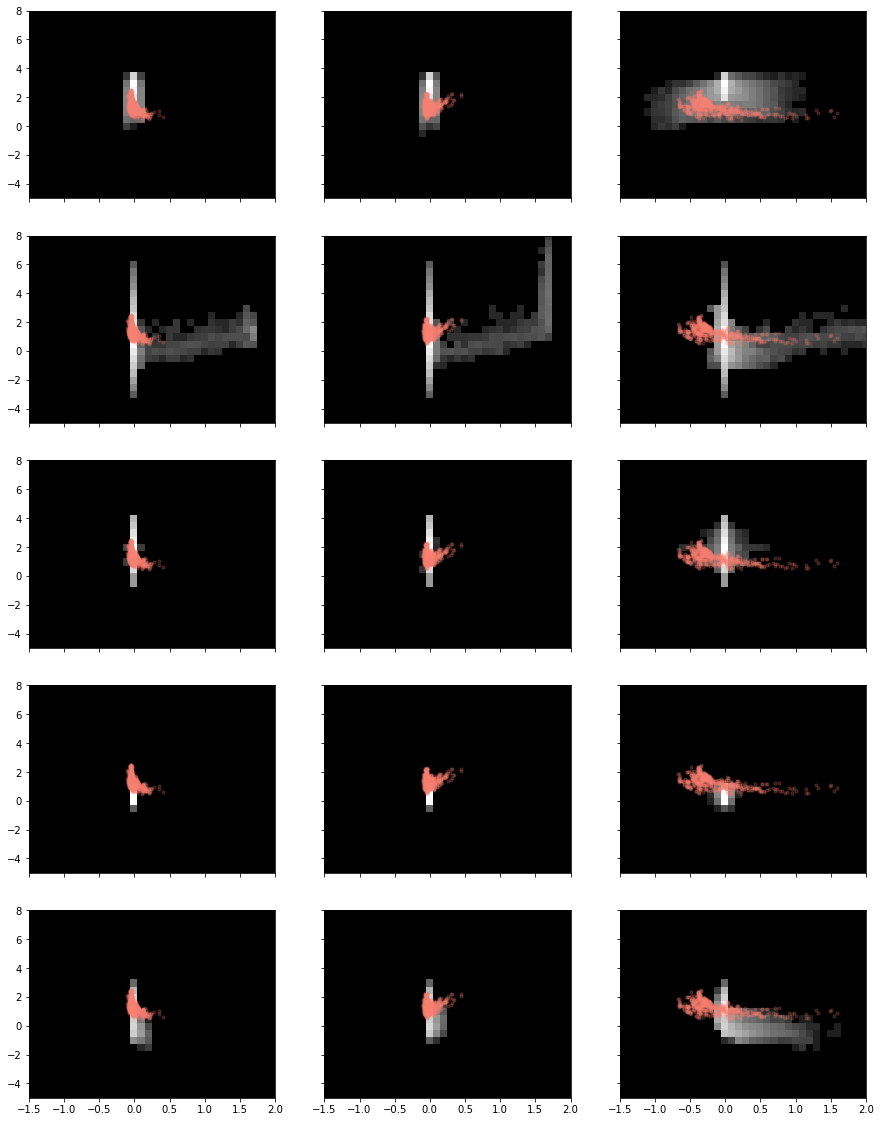

In [30]:
Band1 = 'g'
Band2 = 'i'
TimeGaps = [ [60, 60], [450, 60], [60, 450] ]

RowNo = 5

fig, axs = plt.subplots(RowNo, 3, figsize = (15, 4*RowNo), sharex=True, sharey=True)

for ii, CubeFileName in enumerate(CubeFileNames[:RowNo]):
    
    print('|', end='')

    EventName = CubeFileName[ CubeFileName.rfind('__')+2 : CubeFileName.rfind('.') ]
    CubeFilePath = os.path.join(PathCubeFolder, CubeFileName)

    with open(CubeFilePath, 'rb') as f:
        _ = pickle.load(f)
        InfoDict = pickle.load(f)
        Cube = pickle.load(f)
        
    CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)
    np.nan_to_num(CubeNorm, copy=False);
    
    for jj in range(3):
        
        Map = Enquiry(CubeNorm, InfoDict, Band1, Band2, *TimeGaps[jj]) * 10000000
        
        axs[ii,jj].pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1,
                           norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
        axs[ii,jj].scatter(DataKN[jj][0], DataKN[jj][1], c='salmon', s=10, alpha=0.2)
        
axs[0,0].set_xlim([-1.5, 2])
axs[0,0].set_ylim([-5, 8])
    # plt.title('Filters: {}, {}  Time Gaps: {}, {}'.format(Band1, Band2, dT1, dT2))
    # plt.colorbar()
    

In [18]:
Map = Enquiry(DataCube, InfoDict, Band1, Band2, *TimeGaps[0]) * 10000000

NameError: name 'DataCube' is not defined

In [37]:
Enquiry(TotalCubeNorm, InfoDict, 'g', 'i', 60, 450, 0, 0)

array(0.63998714)

In [38]:
Enquiry(TotalCubeNorm, InfoDict, 'g', 'i', 60, 450, -0.2, 0)

array(0.00219402)

In [265]:
Score1(Interp_load, TimeRange_load, TotalCubeNorm, InfoDict, 'g', 'i', 60, 60, 0.003)

0.39020771513353114

In [266]:
Score1(Interp_load, TimeRange_load, TotalCubeNorm, InfoDict, 'g', 'i', 450, 60, 0.003)

0.40257879656160456

In [267]:
Score1(Interp_load, TimeRange_load, TotalCubeNorm, InfoDict, 'g', 'i', 60, 450, 0.003)

0.8884826325411335

In [268]:
Score1(Interp_load, TimeRange_load, TotalCubeNorm, InfoDict, 'g', 'i', 60, 300, 0.003)

0.880672268907563

In [269]:
Score2(Interp_load, TimeRange_load, TotalCubeNorm, InfoDict, 'g', 'i', 60, 60)

0.5444354097713042

In [270]:
Score2(Interp_load, TimeRange_load, TotalCubeNorm, InfoDict, 'g', 'i', 450, 60)

0.5462622123407903

In [271]:
Score2(Interp_load, TimeRange_load, TotalCubeNorm, InfoDict, 'g', 'i', 60, 450)

0.933966556690755

In [272]:
Score2(Interp_load, TimeRange_load, TotalCubeNorm, InfoDict, 'g', 'i', 60, 300)

0.9087458467124531

In [8]:
FilePath = '/global/homes/l/lianming/Presto-Color-2/data/P1Day_Interp/KN_B19_Interp.pkl'

In [9]:
with open(FilePath, 'rb') as f:
        Interp_load = pickle.load(f)
        TimeRange_load = pickle.load(f)  

In [10]:
data6060 = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 60, 60, PointsPDay=12, ObjNo=100, SeedObj=113)

In [11]:
data45060 = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 450, 60, PointsPDay=12, ObjNo=100, SeedObj=113)

In [12]:
data60450 = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 60, 450, PointsPDay=12, ObjNo=100, SeedObj=113)

In [214]:
data60300 = Functions.CalculateMap(Interp_load, TimeRange_load, 'g', 'i', 60, 300, PointsPDay=12, ObjNo=100, SeedObj=113)

In [163]:
data60450.shape

(2, 547)

In [63]:
Data = np.transpose(data7530)

Band1 = 'g'
Band2 = 'i'
dT1 = 75
dT2 = 30

thr = 0.003

P = 0

for ii in Data:
    
    if Enquiry(TotalCubeNorm, InfoDict, Band1, Band2, dT1, dT2, ii[0], ii[1]) < thr:
        P += 1
        
print(P)

59


In [64]:
Data = np.transpose(data60120)

Band1 = 'g'
Band2 = 'i'
dT1 = 60
dT2 = 120

thr = 0.003

P = 0

for ii in Data:
    
    if Enquiry(TotalCubeNorm, InfoDict, Band1, Band2, dT1, dT2, ii[0], ii[1]) < thr:
        P += 1
        
print(P)

487


In [65]:
Data = np.transpose(data60450)

Band1 = 'g'
Band2 = 'i'
dT1 = 60
dT2 = 450

thr = 0.003

P = 0

for ii in Data:
    
    if Enquiry(TotalCubeNorm, InfoDict, Band1, Band2, dT1, dT2, ii[0], ii[1]) < thr:
        P += 1
        
print(P)

486


In [100]:
Data = np.transpose(data7530)

Band1 = 'g'
Band2 = 'i'
dT1 = 75
dT2 = 30
P = 0

for ii in Data:
    
    P += Enquiry(TotalCubeNorm, InfoDict, Band1, Band2, dT1, dT2, ii[0], ii[1]) 
        
print(P)

456.6705380410647


In [67]:
Data = np.transpose(data60120)

Band1 = 'g'
Band2 = 'i'
dT1 = 60
dT2 = 120

thr = 0.003

P = 0

for ii in Data:
    
    P += Enquiry(TotalCubeNorm, InfoDict, Band1, Band2, dT1, dT2, ii[0], ii[1]) 
        
print(P)

132.43803673072273


In [68]:
Data = np.transpose(data60450)

Band1 = 'g'
Band2 = 'i'
dT1 = 60
dT2 = 450

thr = 0.003

P = 0

for ii in Data:
    
    P += Enquiry(TotalCubeNorm, InfoDict, Band1, Band2, dT1, dT2, ii[0], ii[1]) 
        
print(P)

36.120293490157124


In [75]:
aa = np.arange(2,13,2)
aa = aa.reshape(2,3)
bb = np.arange(6)
bb = bb.reshape(2,3)

In [76]:
aa

array([[ 2,  4,  6],
       [ 8, 10, 12]])

In [77]:
bb

array([[0, 1, 2],
       [3, 4, 5]])

In [78]:
aa+bb

array([[ 2,  5,  8],
       [11, 14, 17]])

In [79]:
aa*bb

array([[ 0,  4, 12],
       [24, 40, 60]])

In [242]:
def Score1(FTInterp, FTTimeRange, CubeData, InfoDict, Band1, Band2, dT1, dT2, thr):
    
    FTData = Functions.CalculateMap(FTInterp, FTTimeRange, Band1, Band2, dT1, dT2, PointsPDay=12, ObjNo=100, SeedObj=113)    
    FTHist,_,_ = np.histogram2d(FTData[0], FTData[1], bins=[InfoDict['BinMag'], InfoDict['BinColor']])
    
    Map = Enquiry(CubeData, InfoDict, Band1, Band2, dT1, dT2)
    
    Mask = Map < thr
    
    Score = np.sum(FTHist[Mask]) / np.sum(FTHist)
    
    return Score

In [243]:
def Score2(FTInterp, FTTimeRange, CubeData, InfoDict, Band1, Band2, dT1, dT2):
    
    FTData = Functions.CalculateMap(FTInterp, FTTimeRange, Band1, Band2, dT1, dT2, PointsPDay=12, ObjNo=100, SeedObj=113)    
    FTHist,_,_ = np.histogram2d(FTData[0], FTData[1], bins=[InfoDict['BinMag'], InfoDict['BinColor']])
    
    Map = Enquiry(CubeData, InfoDict, Band1, Band2, dT1, dT2)
    
    Mask = Map < thr
    
    Score = 1 - np.sum( Map*FTHist ) / np.sum(FTHist)
    
    return Score

In [81]:
np.sum(aa)

42

In [ ]:
int(5.5)

5

In [244]:
def ScoreMap2(FTInterp, FTTimeRange, CubeData, InfoDict, Band1, Band2):
    
    xx = ( InfoDict['dT2s'][:-1] + InfoDict['dT2s'][1:] )/2                      
    yy = ( InfoDict['dT1s'][:-1] + InfoDict['dT1s'][1:] )/2 
    
    Scores = np.zeros( [len(yy), len(xx)] )
    
    for ii, dT1 in enumerate(yy):
        for jj, dT2 in enumerate(xx):
            
            Scores[ii, jj] = Score2(FTInterp, FTTimeRange, CubeData, InfoDict, Band1, Band2, dT1, dT2)
            
    plt.pcolor(InfoDict['dT2s'], InfoDict['dT1s'], Scores)
    plt.xlabel('dT2')
    plt.ylabel('dT1')
    plt.colorbar()
    
    return Scores

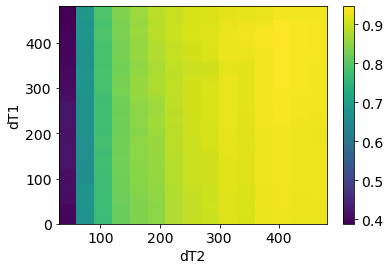

In [245]:
Scores2 = ScoreMap2(Interp_load, TimeRange_load, TotalCubeNorm, InfoDict, 'g', 'i')

In [248]:
def ScoreMap1(FTInterp, FTTimeRange, CubeData, InfoDict, Band1, Band2, thr):
    
    xx = ( InfoDict['dT2s'][:-1] + InfoDict['dT2s'][1:] )/2                      
    yy = ( InfoDict['dT1s'][:-1] + InfoDict['dT1s'][1:] )/2 
    
    Scores = np.zeros( [len(yy), len(xx)] )
    
    for ii, dT1 in enumerate(yy):
        for jj, dT2 in enumerate(xx):
            
            Scores[ii, jj] = Score1(FTInterp, FTTimeRange, CubeData, InfoDict, Band1, Band2, dT1, dT2, thr)
            
    plt.pcolor(InfoDict['dT2s'], InfoDict['dT1s'], Scores)    
    plt.xlabel('dT2')
    plt.ylabel('dT1')    
    plt.colorbar()
    
    return Scores

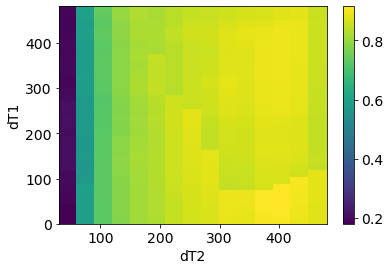

In [249]:
Scores1 = ScoreMap1(Interp_load, TimeRange_load, TotalCubeNorm, InfoDict, 'g', 'i', 0.003)

In [ ]:
plt.clim(-0.2,0.2)

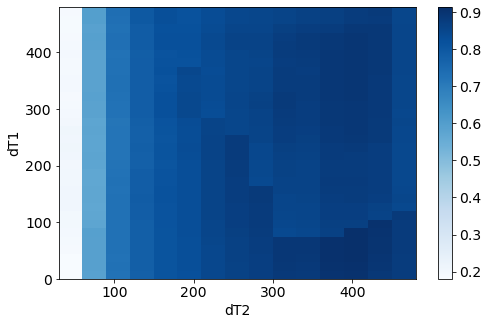

In [261]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

plt.pcolor(InfoDict['dT2s'], InfoDict['dT1s'], Scores1, cmap='')    
plt.xlabel('dT2')
plt.ylabel('dT1')
# plt.clim(0,1)
plt.colorbar()
# plt.xlim([45,None])

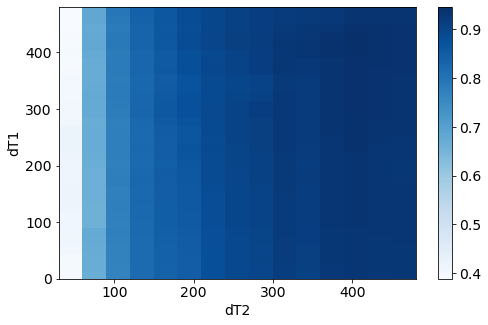

In [264]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

plt.pcolor(InfoDict['dT2s'], InfoDict['dT1s'], Scores2, cmap='Blues')
plt.xlabel('dT2')
plt.ylabel('dT1')
plt.colorbar()
# plt.clim(0,1)
# plt.xlim([45,None])

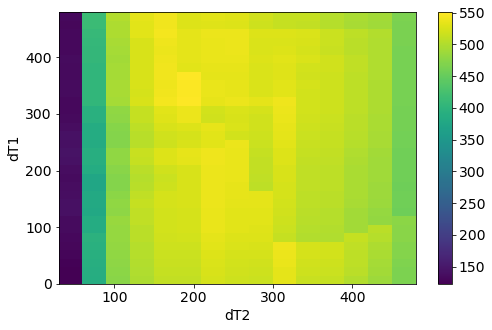

In [225]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

plt.pcolor(InfoDict['dT2s'], InfoDict['dT1s'], Scores1)    
plt.xlabel('dT2')
plt.ylabel('dT1')
plt.colorbar()
# plt.xlim([45,None])

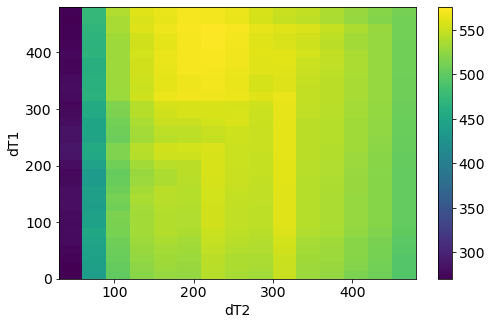

In [227]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

plt.pcolor(InfoDict['dT2s'], InfoDict['dT1s'], Scores2)    
plt.xlabel('dT2')
plt.ylabel('dT1')
plt.colorbar()
# plt.xlim([45,None])

In [17]:
def Enquiry(HashTable, InfoDict, Band1, Band2, dT1, dT2, dMag=None, Color=None):

    Ind1 = InfoDict['Bands'].index(Band1)
    Ind2 = InfoDict['Bands'].index(Band2)

    if dT1<InfoDict['dT1s'][0] or dT1>InfoDict['dT1s'][-1]:
        raise ValueError('The value of dT1 is out of boundary, the available interval is [{:.2f}, {:.2f}].'.format(InfoDict['dT1s'][0], InfoDict['dT1s'][-1]))
        
    else:
        Ind3 = np.where( dT1 >= InfoDict['dT1s'] )[0][-1]

    if dT2<InfoDict['dT2s'][0] or dT2>InfoDict['dT2s'][-1]:
        raise ValueError('The value of dT2 is out of boundary, the available interval is [{:.2f}, {:.2f}].'.format(InfoDict['dT2s'][0], InfoDict['dT2s'][-1]))
    else:
        Ind4 = np.where( dT2 >= InfoDict['dT2s'] )[0][-1]

    Results = HashTable[Ind1, Ind2, Ind3, Ind4]

    if dMag == None:
        pass        
    elif dMag<InfoDict['BinMag'][0] or dMag>=InfoDict['BinMag'][-1]:
        raise ValueError('The value of dMag is out of boundary, the available interval is [{:.2f}, {:.2f}).'.format(InfoDict['BinMag'][0], InfoDict['BinMag'][-1]))
        
    else:
        Results = Results[np.where( dMag >= InfoDict['BinMag'] )[0][-1]]       

    if Color == None:
        pass        
    elif Color<InfoDict['BinColor'][0] or Color>=InfoDict['BinColor'][-1]:
        raise ValueError('The value of Color is out of boundary, the available interval is [{:.2f}, {:.2f}).'.format(InfoDict['BinColor'][0], InfoDict['BinColor'][-1]))
        
    else:
        Results = Results[..., np.where( Color >= InfoDict['BinColor'] )[0][-1] ]

    return Results

||

<ipython-input-89-943fd879596d>:32: RuntimeWarning: invalid value encountered in true_divide
  CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)


||||||||||||||||||||||

(-5.0, 8.0)

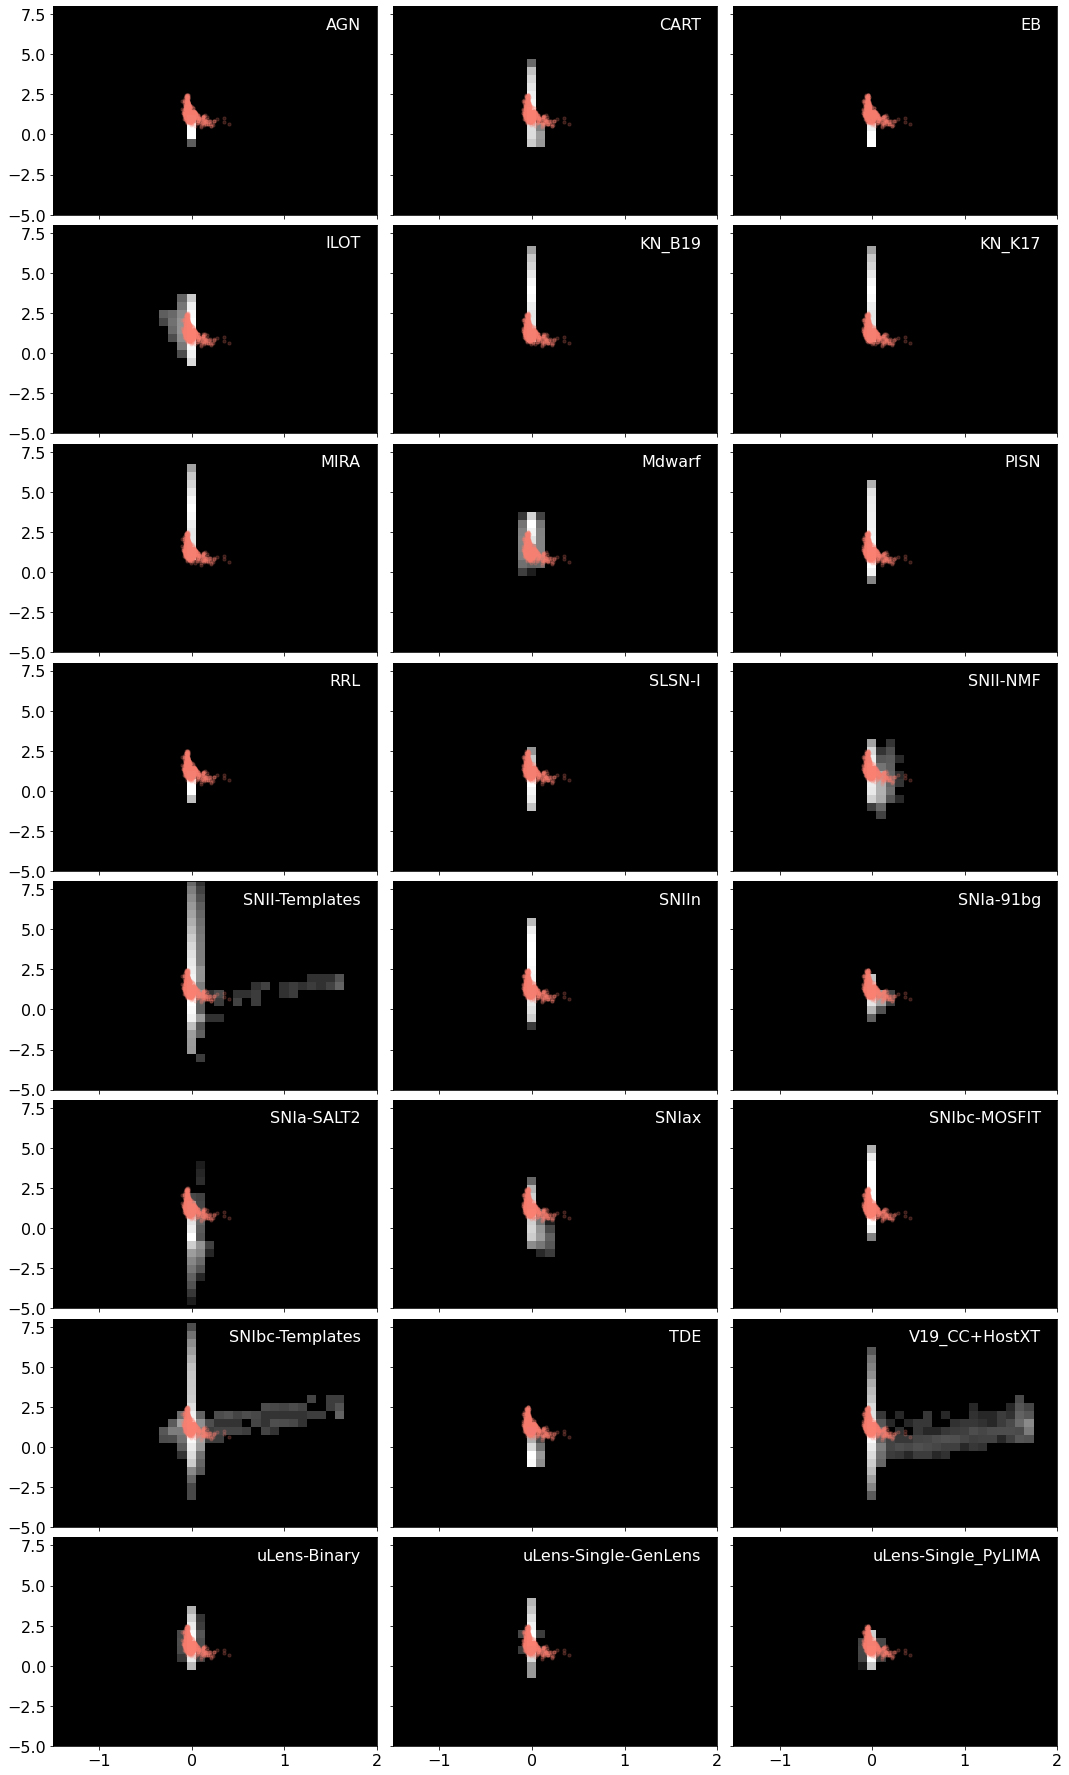

In [89]:
Band1 = 'g'
Band2 = 'i'
TimeGaps = [ [60, 60], [450, 60], [60, 450] ]
Space = 0.05

ColNo = 3
RowNo = 8

fig, axs = plt.subplots(RowNo, ColNo, figsize = (18, 4*RowNo), sharex=True, sharey=True)
fig.subplots_adjust(hspace=Space, wspace=Space)
axsflat = axs.flatten()

ii=0

for EventName in EventNames:
    
    print('|', end='')

#     if EventName == 'V19_CC+HostXT':
#         continue
    for CubeFileName in CubeFileNames:
        if EventName in CubeFileName:
            break
            
    CubeFilePath = os.path.join(PathCubeFolder, CubeFileName)

    with open(CubeFilePath, 'rb') as f:
        _ = pickle.load(f)
        InfoDict = pickle.load(f)
        Cube = pickle.load(f)
        
    CubeNorm = Cube / Cube.max(-1, keepdims=True).max(-2, keepdims=True)
    np.nan_to_num(CubeNorm, copy=False);
    
    jj = 0
    
    Map = Enquiry(CubeNorm, InfoDict, Band1, Band2, *TimeGaps[jj]) * 10000000
    
    axsflat[ii].pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1,
                      norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
    axsflat[ii].scatter(DataKN[jj][0], DataKN[jj][1], c='salmon', s=10, alpha=0.2)
    axsflat[ii].text(0.95, 0.95, EventName, c='w', ha='right', va='top', transform=axsflat[ii].transAxes)
    
    ii += 1
        
axs[0,0].set_xlim([-1.5, 2])
axs[0,0].set_ylim([-5, 8])
    # plt.title('Filters: {}, {}  Time Gaps: {}, {}'.format(Band1, Band2, dT1, dT2))
    # plt.colorbar()
    
# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor="none", bottom=False, left=False )

# plt.xlabel('Time (days)', fontsize=15, labelpad=15)
# if Prop == 'SIM_MAGOBS':
#     if Space==True:
#         plt.ylabel('Apparent Magnitude', fontsize=15, labelpad=25)
#     else:
#         plt.ylabel('Apparent Magnitude', fontsize=15)
# else:
#     if Space==True:
#         plt.ylabel(Prop, fontsize=15, labelpad=20)        
#     else:
#         plt.ylabel(Prop, fontsize=15)
